# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Feb 12 (Monday) 11:00 pm </b> </font>

<font color="blue"> Yangqi Su </font>

# Introduction

Describe the objective of this assignment. You can briefly state how you accompilsh it.
The objective of this assignment is:
1. To review and implement linear least squares regression and Least Mean Squared Regression

2. Experiment on my own dataset. I have a dtaset of FIFA18 players and their attributes and I chose three attributes to be target values that I will try to predict using linear regression.

3. Pass the preliminary test given below with the model implementations

# Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #0. 

The data used here is the data for all soccer players in the game FIFA18.
This dataset contains in total 17994 players and 185 features in total to work with.
The prediction target is the the player's wages and the players overall score

In [323]:
import pandas as pd
fifa=pd.read_csv("./fifa18players.csv", sep=",", header=0)
fifa.shape

(17994, 185)

Here, I took the liberty of selecting only relevant features (**117** in total) into **fifa_relevant** that will be taken into account when fitting the regression, these features include categorical and continuous numerical features. I thus have also subsetted the numerical_features (**53 in total**) into **fifa_numeric** to see if they are important for the prediction of accuracy.

In [420]:
total_features=["full_name","age","height_cm","weight_kg","body_type",
          "eur_value","eur_wage","eur_release_clause","overall","potential","pac",
          "sho","pas","dri","def","phy","international_reputation","skill_moves",
          "weak_foot","work_rate_att","work_rate_def","crossing","finishing",
          "heading_accuracy","short_passing","volleys","dribbling","curve",
          "free_kick_accuracy","long_passing","ball_control","acceleration",
          "sprint_speed","agility","reactions","balance","shot_power","jumping",
          "stamina","strength","long_shots","aggression","interceptions",
          "positioning","vision","penalties","composure","marking","standing_tackle",
          "sliding_tackle","gk_diving","gk_handling","gk_kicking","gk_positioning",
          "gk_reflexes","1_on_1_rush_trait","acrobatic_clearance_trait",
          "avoids_using_weaker_foot_trait","backs_into_player_trait","bicycle_kicks_trait",
          "cautious_with_crosses_trait","chip_shot_trait","chipped_penalty_trait",
          "comes_for_crosses_trait","corner_specialist_trait","diver_trait","dives_into_tackles_trait",
          "diving_header_trait","driven_pass_trait","early_crosser_trait","fan's_favourite_trait",
          "fancy_flicks_trait","finesse_shot_trait","flair_trait","flair_passes_trait",
          "gk_flat_kick_trait","gk_long_throw_trait","gk_up_for_corners_trait","giant_throw_in_trait",
          "inflexible_trait","injury_free_trait","injury_prone_trait","leadership_trait",
          "long_passer_trait","long_shot_taker_trait","long_throw_in_trait","one_club_player_trait",
          "outside_foot_shot_trait","playmaker_trait","power_free_kick_trait","power_header_trait",
          "puncher_trait","rushes_out_of_goal_trait","saves_with_feet_trait","second_wind_trait",
          "selfish_trait","skilled_dribbling_trait","stutter_penalty_trait","swerve_pass_trait",
          "takes_finesse_free_kicks_trait","target_forward_trait","team_player_trait",
          "technical_dribbler_trait","tries_to_beat_defensive_line_trait","poacher_speciality",
          "speedster_speciality","aerial_threat_speciality","dribbler_speciality",
          "playmaker_speciality","engine_speciality","distance_shooter_speciality",
          "crosser_speciality","free_kick_specialist_speciality","tackling_speciality",
          "tactician_speciality","acrobat_speciality","strength_speciality","clinical_finisher_speciality"]

relevant_features=["age","height_cm","weight_kg","body_type","pac",
          "sho","pas","dri","def","phy","international_reputation","skill_moves",
          "weak_foot","work_rate_att","work_rate_def","crossing","finishing",
          "heading_accuracy","short_passing","volleys","dribbling","curve",
          "free_kick_accuracy","long_passing","ball_control","acceleration",
          "sprint_speed","agility","reactions","balance","shot_power","jumping",
          "stamina","strength","long_shots","aggression","interceptions",
          "positioning","vision","penalties","composure","marking","standing_tackle",
          "sliding_tackle","gk_diving","gk_handling","gk_kicking","gk_positioning",
          "gk_reflexes","1_on_1_rush_trait","acrobatic_clearance_trait",
          "avoids_using_weaker_foot_trait","backs_into_player_trait","bicycle_kicks_trait",
          "cautious_with_crosses_trait","chip_shot_trait","chipped_penalty_trait",
          "comes_for_crosses_trait","corner_specialist_trait","diver_trait","dives_into_tackles_trait",
          "diving_header_trait","driven_pass_trait","early_crosser_trait","fan's_favourite_trait",
          "fancy_flicks_trait","finesse_shot_trait","flair_trait","flair_passes_trait",
          "gk_flat_kick_trait","gk_long_throw_trait","gk_up_for_corners_trait","giant_throw_in_trait",
          "inflexible_trait","injury_free_trait","injury_prone_trait","leadership_trait",
          "long_passer_trait","long_shot_taker_trait","long_throw_in_trait","one_club_player_trait",
          "outside_foot_shot_trait","playmaker_trait","power_free_kick_trait","power_header_trait",
          "puncher_trait","rushes_out_of_goal_trait","saves_with_feet_trait","second_wind_trait",
          "selfish_trait","skilled_dribbling_trait","stutter_penalty_trait","swerve_pass_trait",
          "takes_finesse_free_kicks_trait","target_forward_trait","team_player_trait",
          "technical_dribbler_trait","tries_to_beat_defensive_line_trait","poacher_speciality",
          "speedster_speciality","aerial_threat_speciality","dribbler_speciality",
          "playmaker_speciality","engine_speciality","distance_shooter_speciality",
          "crosser_speciality","free_kick_specialist_speciality","tackling_speciality",
          "tactician_speciality","acrobat_speciality","strength_speciality","clinical_finisher_speciality"]

numeric_features=["age","height_cm","weight_kg","pac",
          "sho","pas","dri","def","phy",
          "weak_foot","crossing","finishing",
          "heading_accuracy","short_passing","volleys","dribbling","curve",
          "free_kick_accuracy","long_passing","ball_control","acceleration",
          "sprint_speed","agility","reactions","balance","shot_power","jumping",
          "stamina","strength","long_shots","aggression","interceptions",
          "positioning","vision","penalties","composure","marking","standing_tackle",
          "sliding_tackle","gk_diving","gk_handling","gk_kicking","gk_positioning",
          "gk_reflexes"]

categorical_features=["body_type","international_reputation","skill_moves",
                      "1_on_1_rush_trait","acrobatic_clearance_trait","work_rate_att","work_rate_def",
            "avoids_using_weaker_foot_trait","backs_into_player_trait","bicycle_kicks_trait",
          "cautious_with_crosses_trait","chip_shot_trait","chipped_penalty_trait",
          "comes_for_crosses_trait","corner_specialist_trait","diver_trait","dives_into_tackles_trait",
          "diving_header_trait","driven_pass_trait","early_crosser_trait","fan's_favourite_trait",
          "fancy_flicks_trait","finesse_shot_trait","flair_trait","flair_passes_trait",
          "gk_flat_kick_trait","gk_long_throw_trait","gk_up_for_corners_trait","giant_throw_in_trait",
          "inflexible_trait","injury_free_trait","injury_prone_trait","leadership_trait",
          "long_passer_trait","long_shot_taker_trait","long_throw_in_trait","one_club_player_trait",
          "outside_foot_shot_trait","playmaker_trait","power_free_kick_trait","power_header_trait",
          "puncher_trait","rushes_out_of_goal_trait","saves_with_feet_trait","second_wind_trait",
          "selfish_trait","skilled_dribbling_trait","stutter_penalty_trait","swerve_pass_trait",
          "takes_finesse_free_kicks_trait","target_forward_trait","team_player_trait",
          "technical_dribbler_trait","tries_to_beat_defensive_line_trait","poacher_speciality",
          "speedster_speciality","aerial_threat_speciality","dribbler_speciality",
          "playmaker_speciality","engine_speciality","distance_shooter_speciality",
          "crosser_speciality","free_kick_specialist_speciality","tackling_speciality",
          "tactician_speciality","acrobat_speciality","strength_speciality","clinical_finisher_speciality"]

fifa=fifa[total_features]

I subsetted the data and also filtered out any samples that contain any NA values

In [425]:
fifa_numeric=fifa[numeric_features].dropna()
fifa_relevant=fifa[relevant_features].dropna()
fifa_cat=fifa_relevant[categorical_features].dropna()

In [426]:
fifa_cat.shape

(17994, 68)

In [423]:
fifa_relevant.shape

(17994, 112)

In [424]:
fifa_numeric.shape

(17994, 44)

I then normalize all the numeric features by dividing by 100, to make learning easier.

In [428]:
fifa_numeric[numeric_features]=fifa_numeric[numeric_features]/100
fifa_relevant[numeric_features]=fifa_relevant[numeric_features]/100

Next I will subset out the vectors that I am interested in predicting using linear regression along with the names of the players. Also I will subset out a portion of the data out for some basic visualizations and some very basic correlation analysis, this subset will be deemed **fifa_subset**

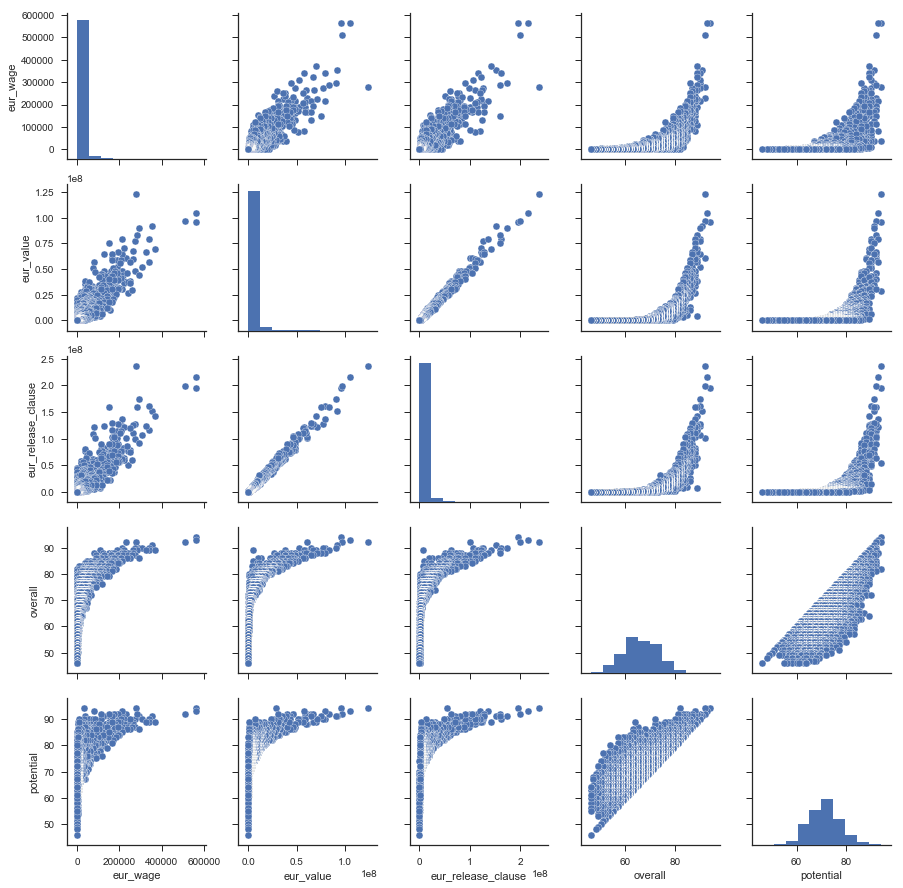

In [568]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
fifa_subset=fifa[['eur_wage','eur_value',
         'eur_release_clause','overall','potential']].dropna()
g = sns.pairplot(fifa_subset)

From the pair plots it is very clear that the players value in euros is strongly correlated with his release clause amount in euros, thus their is no need to predict both. In the analysis I will only look at the players value.

Furthermore, a players potential and his overall score is also strongly correlated, thus I will only look at potential in the anlysis below.

Thus potential and eur value are the two targets I will be interested in.

In [485]:
p_names=fifa['full_name']
p_value=fifa['eur_value']
p_potential=fifa['potential']
fifa_subset=fifa[["age","pac",
          "sho","pas","dri","def","phy", 'eur_value', "potential"]].dropna()

"pac","sho","pas","dri","def","phy" are the very general atheletic attributes of each player, and I would like to look at how they are correlated with eur_value and potential and each other as well.

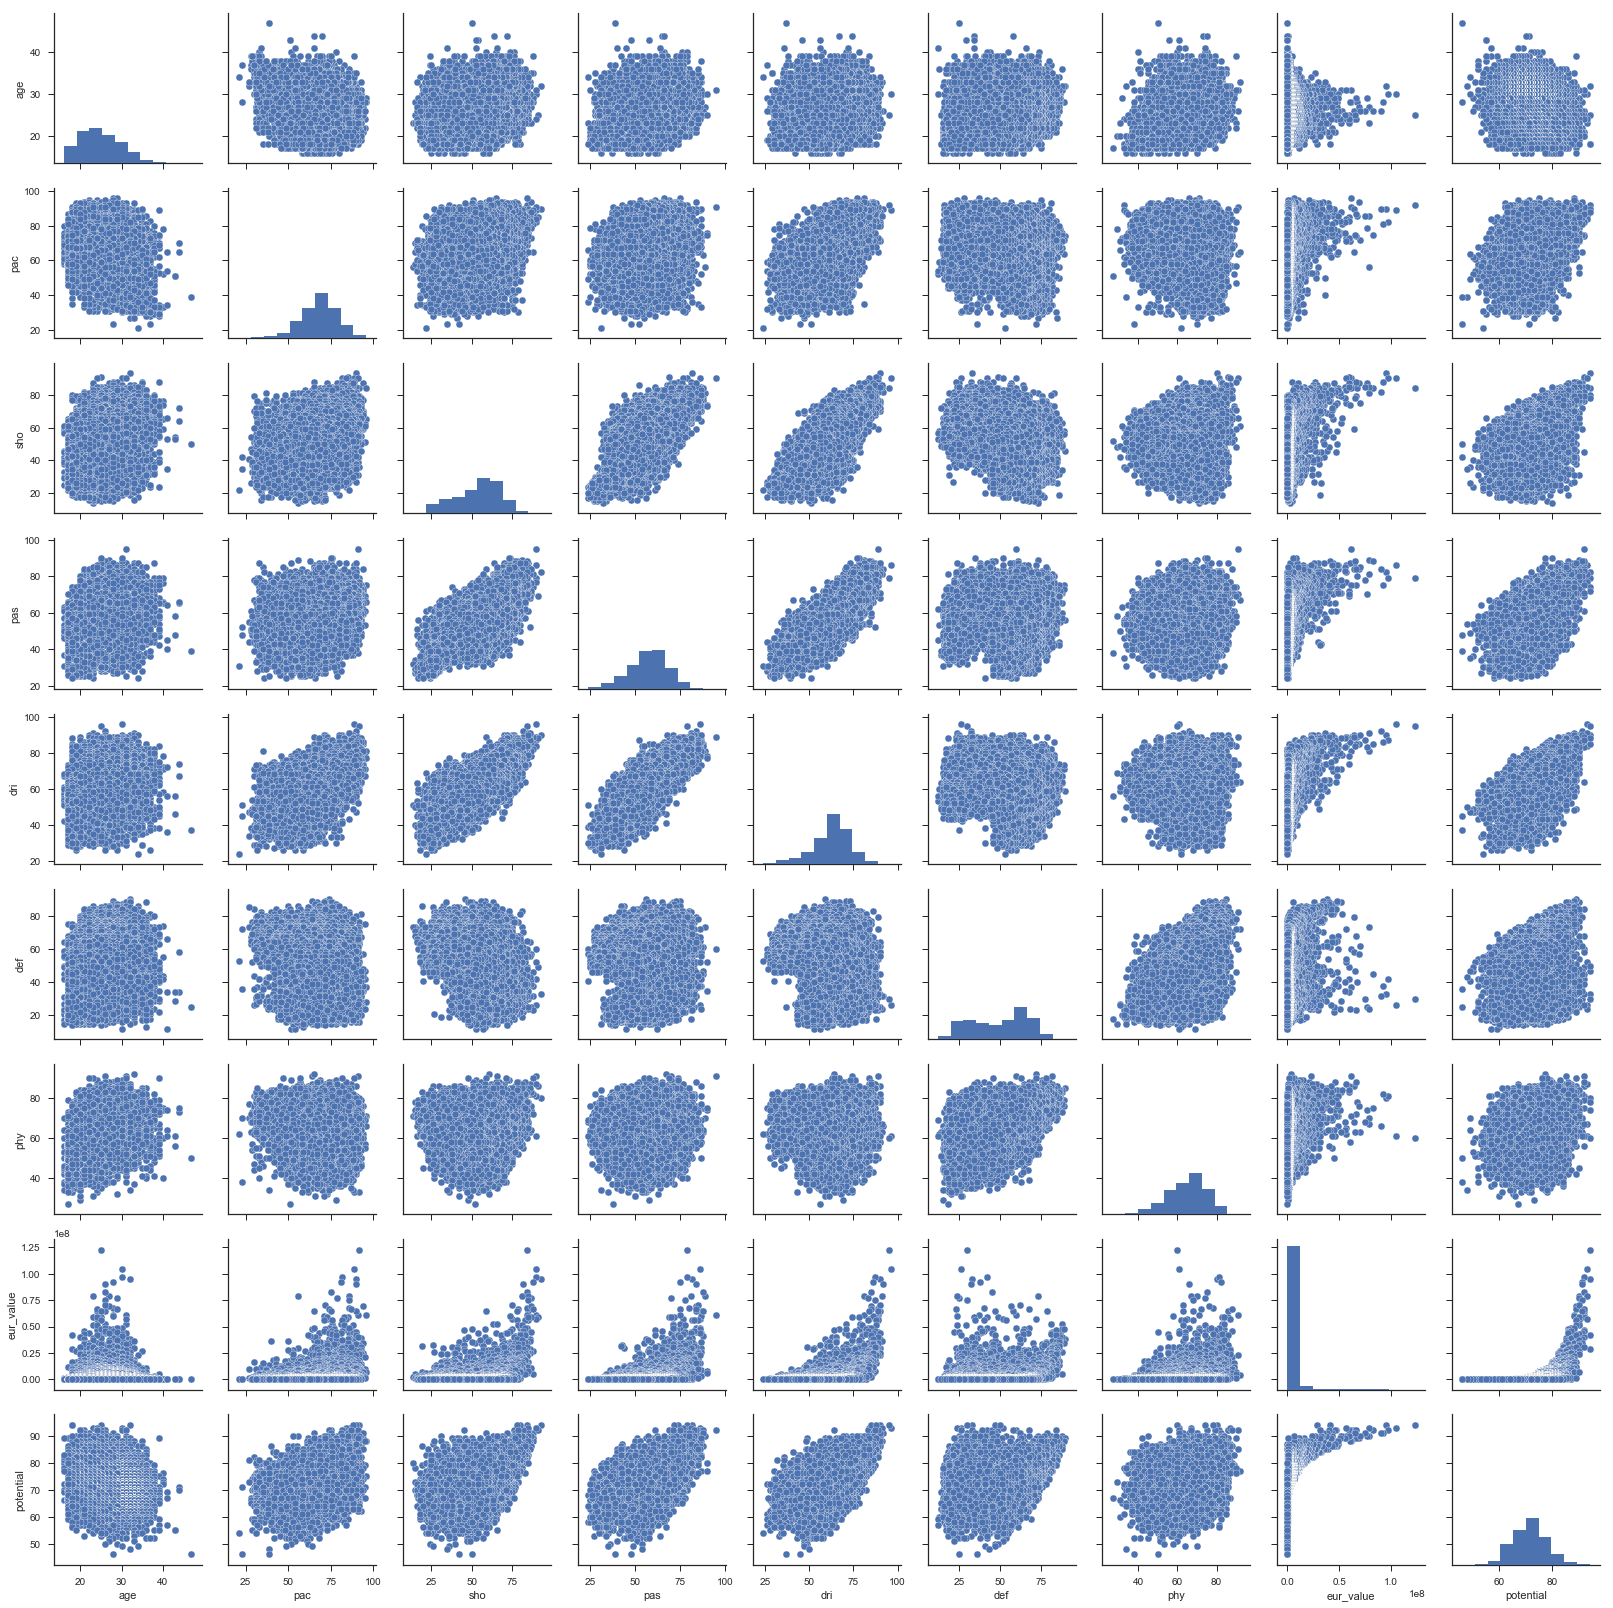

In [486]:
g = sns.pairplot(fifa_subset)

There is a lot of information in this graph, the obvious conclusions being:

players with higher age tend to have lower potential and lower value, though there are also more players that are worth less than those that are worth more.

However, there were some surprising results. the overall ability of passing (pas) and dribbling (dri) is most correlated with a players potential and value in euros, indicating that these two qualities were most sought after and are more important.

Furthermore, a players pace (pac) or speed is the least correlated (with the exception of defense ability (def)) with potential and value, which indicates that being fast on the field doesn't necessarily mean better playing. Defense is slightly correlated with potential but that is because different players have different rolls and not all of them need to play defense, however it is correlated with physicallity (phy), indicating good defense recquires strong body.

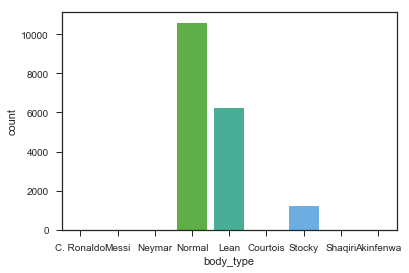

In [488]:
sns.countplot(x="body_type", data=fifa)

another interesting fact in the game is the bodytypes of different players. It turns out that most players are Normal body types, with a higher portion of lean players that stocky players. However, There are 6 players that possess special body types, suggesting that the game custom designed these players.

Finally, I did a PCA anlysis on the players based on their numerical values and found that there were two clusters that formed. Which turned out be the goal keepers and the non goal keepers

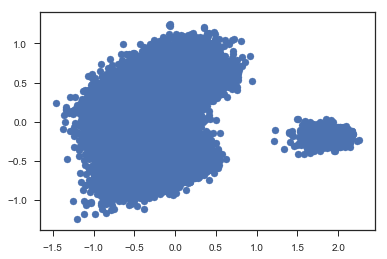

In [531]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pc=pca.fit_transform(fifa_numeric.values)
plt.scatter(pc[:,0],pc[:,1])

In [539]:
gk=fifa_relevant.index[fifa_relevant["gk_reflexes"]>0.3].tolist()

In [540]:
col=['b' for i in range(pc.shape[0])]
for i in gk:
    col[i]='r'

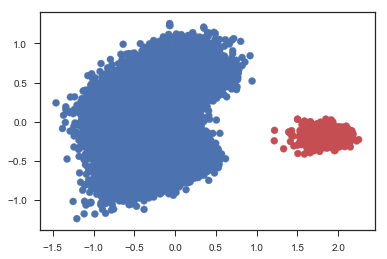

In [541]:
plt.scatter(pc[:,0],pc[:,1], c=col)

# Method

Summarize the linear models (least-squares and LMS) and explain your implementation of **class** *LinearModel*. 
The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the linear models 
 - your implementation and description


### Super Classs Definition

In [546]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None
        
    def reset(self):
        pass
    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

This is the class for the linear regression model. It analystically solves the problem of of linear regression where the input is a matrix $X$, in which the rows are samples and columns are features, and $T$ a 2-$d$ vector of target values. It first adds a column of 1s to $X$ to act as the term for the bias. 
It then calculated the weights using the numpy linear algebra modules' own least squares method. This entire process is done by the train function of the class.
To use the learned weights, it first checks if the weights have been learned, if they haven't it will raise error; else, the function use will output the predicted values for new data.

In [547]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        

    # train least-squares model
    def train(self, X, T):
        X1 = self.add_ones(X)
        self.w = np.linalg.lstsq(X1,T)[0]
        
    
    # apply the learned model to data X
    def use(self, X):
        assert self.w.any() != None,"weights have not been learned"
        X1 = self.add_ones(X)
        return np.dot(X1,self.w).reshape((-1,1))

### Least Mean Squares
In Least mean square, we update the weights using gradient descent and train with one sample's feature at a time. This method can help save computational resources and time in the long run since reading in and calculating on a large matrix is not efficient. Gradient descent will converge to an optimal as training progresses, but it might not be the optimal given by the analytical solution.

The class initialization requires a learning rate $\alpha$ and also by default it assigns bias_added to be false.

In my function **train_step**, I first check if bias has been added to the vector feature given, and add a 1 to the front of the vector if it hasn't. I then see if the model has previously initialized weights, and initialize weights as zeros if it doesn't. I finally perform One step of gradient descent on the weights using the input feature vector and target vector according to the following update rule:

$$
wv^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$

For the full **train** function, I add bias to the features ( a column of ones), initialize weights if necessary and train through all the samples once.

In [594]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha, bias_added=False):
        LinearModel.__init__(self)
        self.alpha = alpha
        self.bias_added=bias_added
    def reset(self,alpha, bias_added=False):
        self.w=None
        self.alpha=alpha
        self.bias_added=bias_added
    # batch training by using train_step function
    def train(self, X, T):
        N=X.shape[0]
        #X1=self.add_ones(X)
        #if np.any(self.w) == None:
            #self.w=np.zeros(X.shape[1])
        for k in range(N):
            self.train_step(X[k,:],T[k,:])
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        if self.bias_added==False:
            x=np.hstack((1,x))
        if np.any(self.w) == None:
            self.w=np.zeros(x.shape[0])
        self.w = self.w - self.alpha*(np.dot(x,self.w)-t)*x
    # apply the current model to data X
    def use(self, X):
        assert self.w.any() != None, "weights have not been learned"
        if self.bias_added==False:
            X1 = self.add_ones(X)
        return np.dot(X1,self.w).reshape((-1,1))
        

### Usage Examples

In [442]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

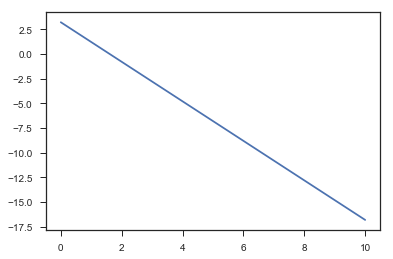

In [443]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

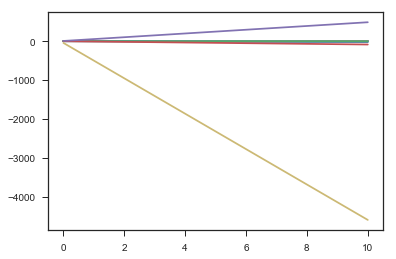

In [444]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))


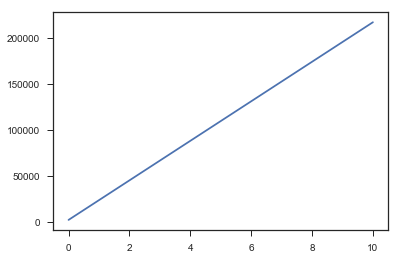

In [445]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments
**Step ONE**

The LabelEncoderwrapper class is a wrapper on the LabelEncoder from scikit-learn's preprocessing. 
The purpose of the class and its methods is to transform a dataframe that has categorical non-numeric values into a fully numerical matrix, with the ability to change any of numerical values back to the original non-numerical values.

To use it, simply initiate an instance of the class, which requires the dataframe one is trying to convert, and run the **convert2num** function. 

The instance will store a dictionary that will be used to translate the numerical values back into their original meanings with the **num2cat** function which requires the name of the categorical feature **(the name must match the original name in the dataframe)** one wishes to translate and a numerical vector that is to be translated.

In [453]:
from sklearn.preprocessing import LabelEncoder
# a class for preprocessing panda dataframes that has categorical values 
# into numeric dataframes that can later be converted back into original pandas dataframe
class LabelEncoderWrapper():    
    def __init__(self, df):
        self.df = df
        self.dict={}
    
    def convert2num(self):
        type_name=zip(self.df.dtypes, self.df.columns.values)
        df_cp=self.df.copy()
        for (dtype, name) in type_name:
            if str(dtype) == "object" or str(dtype) == "bool":
                le, df_cp[name] = self.cat2num(df_cp[name])
                self.dict[name] = le
        return df_cp
    
    def cat2num(self, cat):
        le=LabelEncoder()
        num=le.fit_transform(cat)
        return le, num     
        
    def original(self):
        return self.df
    
    def num2cat(self, name, num):
        assert name in self.dict.keys(), "No key value for "+name+" was found in the dictionary"
        le=self.dict[name]
        return le.inverse_transform(num)

borrowed the code for residual mean squared error from below (modified the sum to a mean since its mean squared)

In [395]:
def rmse(T, Y): 
    return np.sqrt(np.mean((T-Y)**2))

Train data function, that will train the data features to predict the target; previously I normalized the numerical features so that I don't need a absurdly small learning rate

In [454]:
def TrainData(features,target, lr=0.0001):
    X=features.values
    T=target.values.reshape((-1,1))
    lsq=LinearRegress()
    lsq.train(X,T)
    print(rmse(T,lsq.use(X)))
    lms=LMS(lr)
    for i in range(1):
        lms.train(X,T)
    print(rmse(T,lms.use(X)))

**step TWO**
Now I will convert all the relevant features into numeric datatypes for the regression analysis

In [455]:
fifaRel_cat2num=LabelEncoderWrapper(fifa_relevant)
fifa_relevant=fifaRel_cat2num.convert2num()
fifaCat_cat2num=LabelEncoderWrapper(fifa_cat)
fifa_cat=fifaCat_cat2num.convert2num()

In [496]:
fifa_relevant.head()

,age,height_cm,weight_kg,body_type,pac,sho,pas,dri,def,phy,...,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality
0,0.32,1.85,0.80,1,0.90,0.93,0.82,0.90,0.33,0.80,...,0,0,1,0,0,0,0,1,0,1
1,0.30,1.70,0.72,4,0.89,0.90,0.86,0.96,0.26,0.61,...,0,0,0,0,1,0,0,1,0,1
2,0.25,1.75,0.68,5,0.92,0.84,0.79,0.95,0.30,0.60,...,0,0,0,0,0,0,0,1,0,0
3,0.30,1.82,0.86,6,0.82,0.90,0.79,0.87,0.42,0.81,...,0,0,0,0,0,0,0,1,0,1
4,0.31,1.93,0.92,6,0.91,0.90,0.95,0.89,0.60,0.91,...,0,0,0,0,0,0,0,0,0,0


In [497]:
fifa_cat.head()

,body_type,international_reputation,skill_moves,1_on_1_rush_trait,acrobatic_clearance_trait,work_rate_att,work_rate_def,avoids_using_weaker_foot_trait,backs_into_player_trait,bicycle_kicks_trait,...,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality
0,1,5,5,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1,4,5,4,0,0,2,2,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,5,5,5,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,6,5,4,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,6,5,1,1,0,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I then train on the numeric features, the categorical features and all the reelvant features to compare which has a better prediction on the players potential. The results show that in all cases, the LMS preformed worse than the least squares solution. training with only the categorical features is much worse than with the numerical data, which yields almost the same error as all the relevant features.

In [489]:
TrainData(fifa_numeric, p_potential)

447.023075273
958.938063147


In [490]:
TrainData(fifa_cat, p_potential)

711.755354864
1627.19657794


In [491]:
TrainData(fifa_relevant, p_potential)

422.071668585
927.211922191


Next I train on the numeric features, the categorical features and all the reelvant features to compare which has a better prediction on the players' value in euros. Again, the results show that in all cases, the LMS preformed worse than the least squares solution. However, in this case, training with only the categorical features is slightly better than with the just numerical features, thought utilizing both still yields the least residual error.

In [492]:
TrainData(fifa_numeric, p_value)

561698411.493
771460892.567


In [493]:
TrainData(fifa_cat, p_value)

426141476.475
737876035.742


In [498]:
TrainData(fifa_relevant, p_value)

371306978.181
750875052.591


**Step THREE** next I train by removing each feature seperately to see which has the biggest effect on the residual error by storing the residuals in a dictionary and eventually outputing the top 5 features that are most important to player potential. This is done for both the LMS model and the least squares model.

In [592]:
def featureImportant2value(df, target, model):
    model_names=["lsq","LMS"]
    target=target.values.reshape((-1,1))
    models=[LinearRegress(), LMS(0.0001)]
    if model not in model_names:
        raise("model not found")
    else:
        i=model_names.index(model)
    model_effect={}
    model=models[i]
    model.train(df.values, target)
    res=rmse(T=target, Y=model.use(df.values))
    model.reset(0.0001)
    for feat in df.columns.values:
        new_df=df.drop(feat, axis=1).values
        model.train(new_df, target)
        Y=model.use(new_df)
        new_res=rmse(T=target, Y=Y)
        model_effect[feat]=new_res-res
        model.reset(0.0001)
    print(sorted(model_effect, key=model_effect.get, reverse=True)[:10])
    return model_effect

In [582]:
ImportantFeatures2Value = featureImportant2value(fifa_relevant, p_potential, 'lsq')

['age', 'reactions', 'international_reputation', 'composure', 'heading_accuracy', 'stamina', 'phy', 'ball_control', 'positioning', 'leadership_trait']


In [595]:
ImportantFeatures2Potential = featureImportant2value(fifa_relevant, p_potential, 'LMS')

['height_cm', 'international_reputation', 'dri', 'pac', 'reactions', 'weight_kg', 'phy', 'strength', 'gk_reflexes', 'pas']


I then plotted the features that appeared in both methods to see their correlation with player potential values

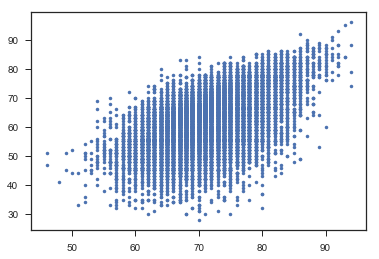

In [597]:
plt.plot(fifa['potential'].values, fifa['reactions'].values, ".")

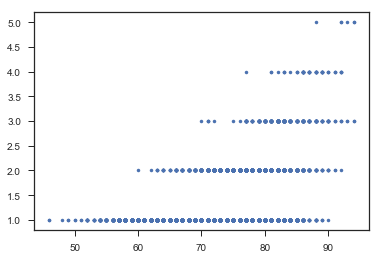

In [598]:
plt.plot(fifa['potential'].values, fifa['international_reputation'].values, ".")

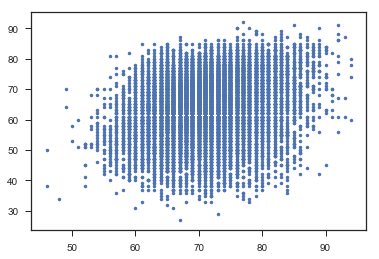

In [596]:
plt.plot(fifa['potential'].values, fifa['phy'].values, ".")

# Conclusions

It was difficult to pass the preliminary test;
However I am still not quite sure why the top features chosen included phy since it doesn't really look to be correlated with player potential. Perhaps it is the way I am trying to find the features that are important. Any feedback would be great, thank you.

# References
dataset URL:

https://www.kaggle.com/kevinmh/fifa-18-more-complete-player-dataset

# Extra Credit

If you want to work more for an extra credit, place your work here about weight analysis. 
Try to answer to the question: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? 
    
    

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 

# Preliminary Test

In [482]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.
